#Importing Dataset

In [7]:
! kaggle datasets download -d patriciabrezeanu/60-fruit-types-curated-dataset

Dataset URL: https://www.kaggle.com/datasets/patriciabrezeanu/60-fruit-types-curated-dataset
License(s): Community Data License Agreement - Permissive - Version 1.0
... resuming from 1732247552 bytes (2587649972 bytes left) ...
100% 4.02G/4.02G [02:12<00:00, 21.2MB/s]
100% 4.02G/4.02G [02:12<00:00, 19.6MB/s]


In [8]:
!rm -rf tuttifrutti*
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: F-M/Kiwi/kiwi (3).jpeg  
  inflating: F-M/Kiwi/kiwi (3).jpg   
  inflating: F-M/Kiwi/kiwi (3).png   
  inflating: F-M/Kiwi/kiwi (30).jpg  
  inflating: F-M/Kiwi/kiwi (31).jpg  
  inflating: F-M/Kiwi/kiwi (32).jpg  
  inflating: F-M/Kiwi/kiwi (33).jpg  
  inflating: F-M/Kiwi/kiwi (34).jpg  
  inflating: F-M/Kiwi/kiwi (35).jpg  
  inflating: F-M/Kiwi/kiwi (36).jpg  
  inflating: F-M/Kiwi/kiwi (37).jpg  
  inflating: F-M/Kiwi/kiwi (38).jpg  
  inflating: F-M/Kiwi/kiwi (39).jpg  
  inflating: F-M/Kiwi/kiwi (4).png   
  inflating: F-M/Kiwi/kiwi (40).jpg  
  inflating: F-M/Kiwi/kiwi (41).jpg  
  inflating: F-M/Kiwi/kiwi (42).jpg  
  inflating: F-M/Kiwi/kiwi (43).jpg  
  inflating: F-M/Kiwi/kiwi (44).jpg  
  inflating: F-M/Kiwi/kiwi (45).jpg  
  inflating: F-M/Kiwi/kiwi (46).jpg  
  inflating: F-M/Kiwi/kiwi (47).jpg  
  inflating: F-M/Kiwi/kiwi (48).jpg  
  inflating: F-M/Kiwi/kiwi (49).jpg  
  inflating: F-M/Kiwi/kiwi (5).jpeg  

#Importing libraries

In [9]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, callbacks

In [13]:
!mv A\ -\ E/* tuttifrutti
!mv F-M/* tuttifrutti
!mv M-R/* tuttifrutti
!mv S-Y/* tuttifrutti

In [14]:
from PIL import Image
def convert_to_supported_format(image_path, output_format='JPEG'):
    try:
        with Image.open(image_path) as img:
            output_path = os.path.splitext(image_path)[0] + '.' + output_format.lower()
            os.remove(image_path)
            img.convert('RGB').save(output_path, format=output_format)
            print(f"Converted {image_path} to {output_path}")
    except Exception as e:
        print(f"Error converting {image_path}: {e}")

# Convert all unsupported images in the directory
from glob import glob

image_dirs = glob('/content/tuttifrutti/*')

for image_dir in image_dirs:
  for filename in os.listdir(image_dir):
     file_path = os.path.join(image_dir, filename)
     convert_to_supported_format(file_path)

Converted /content/tuttifrutti/Redcurrant/redcurrant (112).jpg to /content/tuttifrutti/Redcurrant/redcurrant (112).jpeg
Converted /content/tuttifrutti/Redcurrant/redcurrant (147).jpg to /content/tuttifrutti/Redcurrant/redcurrant (147).jpeg
Converted /content/tuttifrutti/Redcurrant/redcurrant (72).jpg to /content/tuttifrutti/Redcurrant/redcurrant (72).jpeg
Converted /content/tuttifrutti/Redcurrant/redcurrant (80).jpg to /content/tuttifrutti/Redcurrant/redcurrant (80).jpeg
Converted /content/tuttifrutti/Redcurrant/redcurrant (140).jpg to /content/tuttifrutti/Redcurrant/redcurrant (140).jpeg
Converted /content/tuttifrutti/Redcurrant/redcurrant (42).jpg to /content/tuttifrutti/Redcurrant/redcurrant (42).jpeg
Converted /content/tuttifrutti/Redcurrant/redcurrant (159).jpg to /content/tuttifrutti/Redcurrant/redcurrant (159).jpeg
Converted /content/tuttifrutti/Redcurrant/redcurrant (105).jpg to /content/tuttifrutti/Redcurrant/redcurrant (105).jpeg
Converted /content/tuttifrutti/Redcurrant/redc

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Converted /content/tuttifrutti/Papaya/papaya (89).jpg to /content/tuttifrutti/Papaya/papaya (89).jpeg
Converted /content/tuttifrutti/Papaya/papaya (65).jpg to /content/tuttifrutti/Papaya/papaya (65).jpeg
Converted /content/tuttifrutti/Papaya/papaya (72).jpg to /content/tuttifrutti/Papaya/papaya (72).jpeg
Converted /content/tuttifrutti/Papaya/papaya (73).jpg to /content/tuttifrutti/Papaya/papaya (73).jpeg
Converted /content/tuttifrutti/Papaya/papaya (6).jpg to /content/tuttifrutti/Papaya/papaya (6).jpeg
Converted /content/tuttifrutti/Papaya/papaya (80).jpg to /content/tuttifrutti/Papaya/papaya (80).jpeg
Converted /content/tuttifrutti/Papaya/papaya (101).jpg to /content/tuttifrutti/Papaya/papaya (101).jpeg
Converted /content/tuttifrutti/Papaya/papaya (26).jpg to /content/tuttifrutti/Papaya/papaya (26).jpeg
Converted /content/tuttifrutti/Papaya/papaya (11).jpg to /content/tuttifrutti/Papaya/papaya (11).jpeg
Converted /content/tuttifrutti/

In [15]:
# load dataset
train_dir = '/content/tuttifrutti'
test_dir = '/content/tuttifrutti'

# Load training dataset without preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=5,
    image_size=(224, 224),
    seed=123,
    shuffle=True,
)

# Load validation dataset without preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=5,
    image_size=(224, 224),
    seed=42,
)

Found 8328 files belonging to 55 classes.
Using 6663 files for training.
Found 8328 files belonging to 55 classes.
Using 1665 files for validation.


In [16]:
# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(train_dir))

# Print the class names and the number of classes
print("Class Names:", class_names)
num_classes = len(class_names)
print("Number of Classes:", num_classes)

Class Names: ['Apple', 'Apricot', 'Avocado', 'Banana', 'Blackberry', 'Blueberry', 'Boysenberry', 'Cantaloupe', 'Cherry', 'Clementine', 'Coconut', 'Cranberry', 'Cucumber', 'Currant', 'Date', 'Elderberry', 'Fig', 'Gooseberry', 'Grape', 'Grapefruit', 'Guava', 'Guinep', 'Honeydew', 'Jackfruit', 'Kiwi', 'Kumquat', 'Lemon', 'Lime', 'Longan', 'Lychee', 'Mango', 'Mangosteen', 'Mulberry', 'Nectarine', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Persimmon', 'Pineapple', 'Pitahaya', 'Plum', 'Pomegranate', 'Pomelo', 'Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Tamarillo', 'Ugli Fruit', 'Watermelon', 'White Currant', 'Yellow Passion Fruit']
Number of Classes: 55


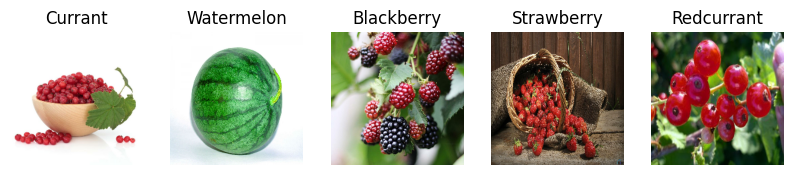

In [17]:
def show_images(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch from the dataset
        for i in range(5):  # Display 25 images
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

# Show images from training dataset
show_images(train_ds, class_names)
plt.show()

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.shuffle(128)
val_ds = val_ds

##Data Augmentation

In [19]:
# Augmentation for training dataset
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])

#Building Model

In [20]:
base_model = tf.keras.applications.MobileNet(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

17225924/17225924 [==============================] - 2s 0us/step


In [21]:
preprocess_input = tf.keras.applications.mobilenet.preprocess_input
base_model.trainable = False

In [22]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes)

In [23]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                             

##Train Model

In [26]:
# Define EarlyStopping callback
early_stopping = callbacks.EarlyStopping(patience=3)

# Train the model with early stopping
history = model.fit(
    train_ds,
    epochs=100,
    validation_data=val_ds,
    callbacks=[early_stopping]  # Add the EarlyStopping callback to the training process
)

Epoch 1/100
1333/1333 [==============================] - 83s 54ms/step - loss: 3.6833 - accuracy: 0.1295 - val_loss: 2.6369 - val_accuracy: 0.3652
Epoch 2/100
1333/1333 [==============================] - 74s 52ms/step - loss: 2.4222 - accuracy: 0.3844 - val_loss: 1.9020 - val_accuracy: 0.5291
Epoch 3/100
1333/1333 [==============================] - 71s 50ms/step - loss: 1.8790 - accuracy: 0.5169 - val_loss: 1.5428 - val_accuracy: 0.6210
Epoch 4/100
1333/1333 [==============================] - 74s 53ms/step - loss: 1.5895 - accuracy: 0.5826 - val_loss: 1.3272 - val_accuracy: 0.6691
Epoch 5/100
1333/1333 [==============================] - 76s 53ms/step - loss: 1.4021 - accuracy: 0.6297 - val_loss: 1.1875 - val_accuracy: 0.6949
Epoch 6/100
1333/1333 [==============================] - 74s 51ms/step - loss: 1.2667 - accuracy: 0.6629 - val_loss: 1.0883 - val_accuracy: 0.7081
Epoch 7/100
1333/1333 [==============================] - 74s 52ms/step - loss: 1.1694 - accuracy: 0.6874 - val_loss: 1

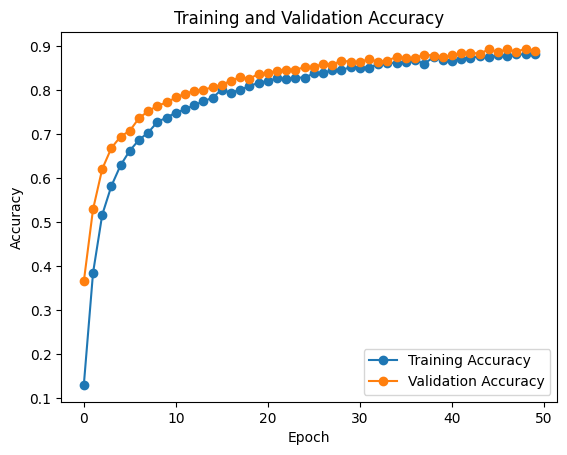

In [27]:
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

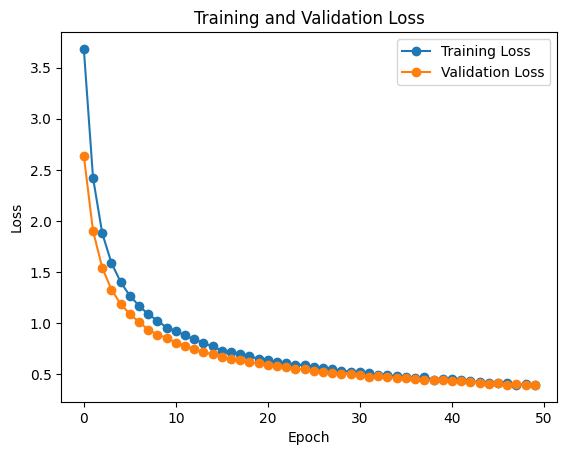

In [28]:
plt.plot(history.history['loss'], label='Training Loss',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [29]:
def predict(model, img):
    img_array = tf.keras.utils.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predictions = tf.nn.softmax(predictions)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 0)
    return predicted_class, confidence

1/1 [==============================] - 0s 67ms/step


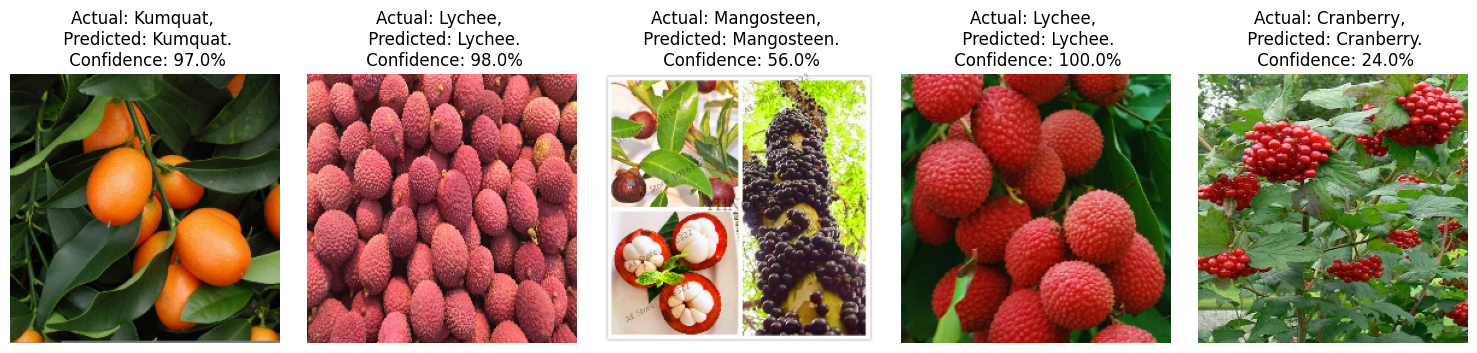

In [31]:
import matplotlib.pyplot as plt

# Assuming val_ds is your validation dataset
plt.figure(figsize=(15, 15))
for images, labels in val_ds.take(1):
    for i in range(5):
        ax = plt.subplot(5, 5, i+1)  # Adjust the subplot layout as per your preference
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis('off')

plt.tight_layout()
plt.show()

In [32]:
model.save('model_capstone.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)